### 1) Importation et lecture du fichier incident_event_log.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

df1 = pd.read_csv("D:\ESILV\Annee5\Python_For_Data_Analysis\Final_Project\incident_event_log.csv")
df1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### 2) Est-il plus pratique de prendre la date de résolution ou la date de clôture de l’incident ?

In [2]:
i =0
for elem in df1["resolved_at"]:
    if (elem == "?"):
        i+=1
print(i)

3141


In [3]:
i =0
for elem in df1["closed_at"]:
    if (elem == "?"):
        i+=1
print(i)

0


In [4]:
df1['opened_at'].count()

141712

In [5]:
opened_at = df1["opened_at"].count()
resolved_at = 141712-3141
closed_at = df1["closed_at"].count()

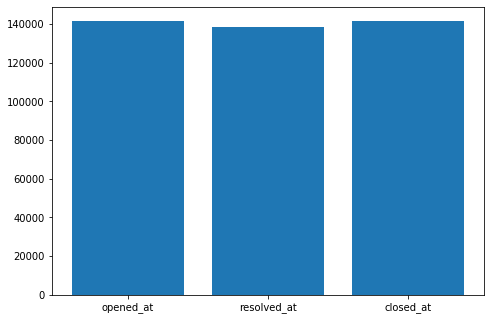

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
date = ['opened_at', 'resolved_at', 'closed_at']
incidents = [opened_at,resolved_at,closed_at]
ax.bar(date,incidents)
plt.show()

#### Nous voyons qu'il est plus intéressant de prendre la colonne "closed_at" que la colonne "resolved_at" dû aux "?" dans la colonne "resolved_at"

### 3) Faut-il prendre en compte la priorité ou l’urgence et l’impact ?

In [7]:
df1["priority"].value_counts()

3 - Moderate    132452
4 - Low           4030
2 - High          2972
1 - Critical      2258
Name: priority, dtype: int64

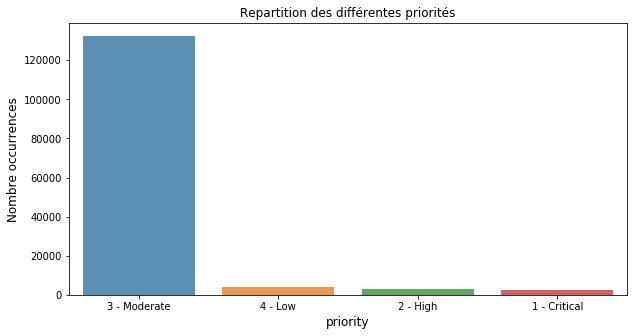

In [8]:
priority_count  = df1['priority'].value_counts()
priority_count = priority_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(priority_count.index, priority_count.values, alpha=0.8)
plt.title('Repartition des différentes priorités')
plt.ylabel('Nombre occurrences', fontsize=12)
plt.xlabel('priority', fontsize=12)
plt.show()

#### La priorité étant calculée en fonction de l'urgence et de l'impact, elle est plus représentative dans le problème qui nous intéresse

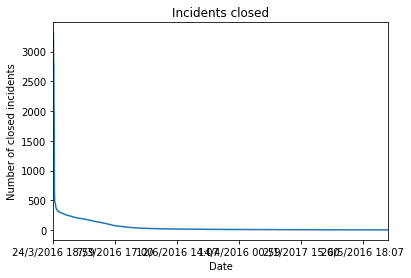

In [9]:
closed_at_incidents = df1["closed_at"].value_counts()
closed_at_incidents.plot()
plt.title('Incidents closed')
plt.ylabel('Number of closed incidents')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (50.0, 10.0)

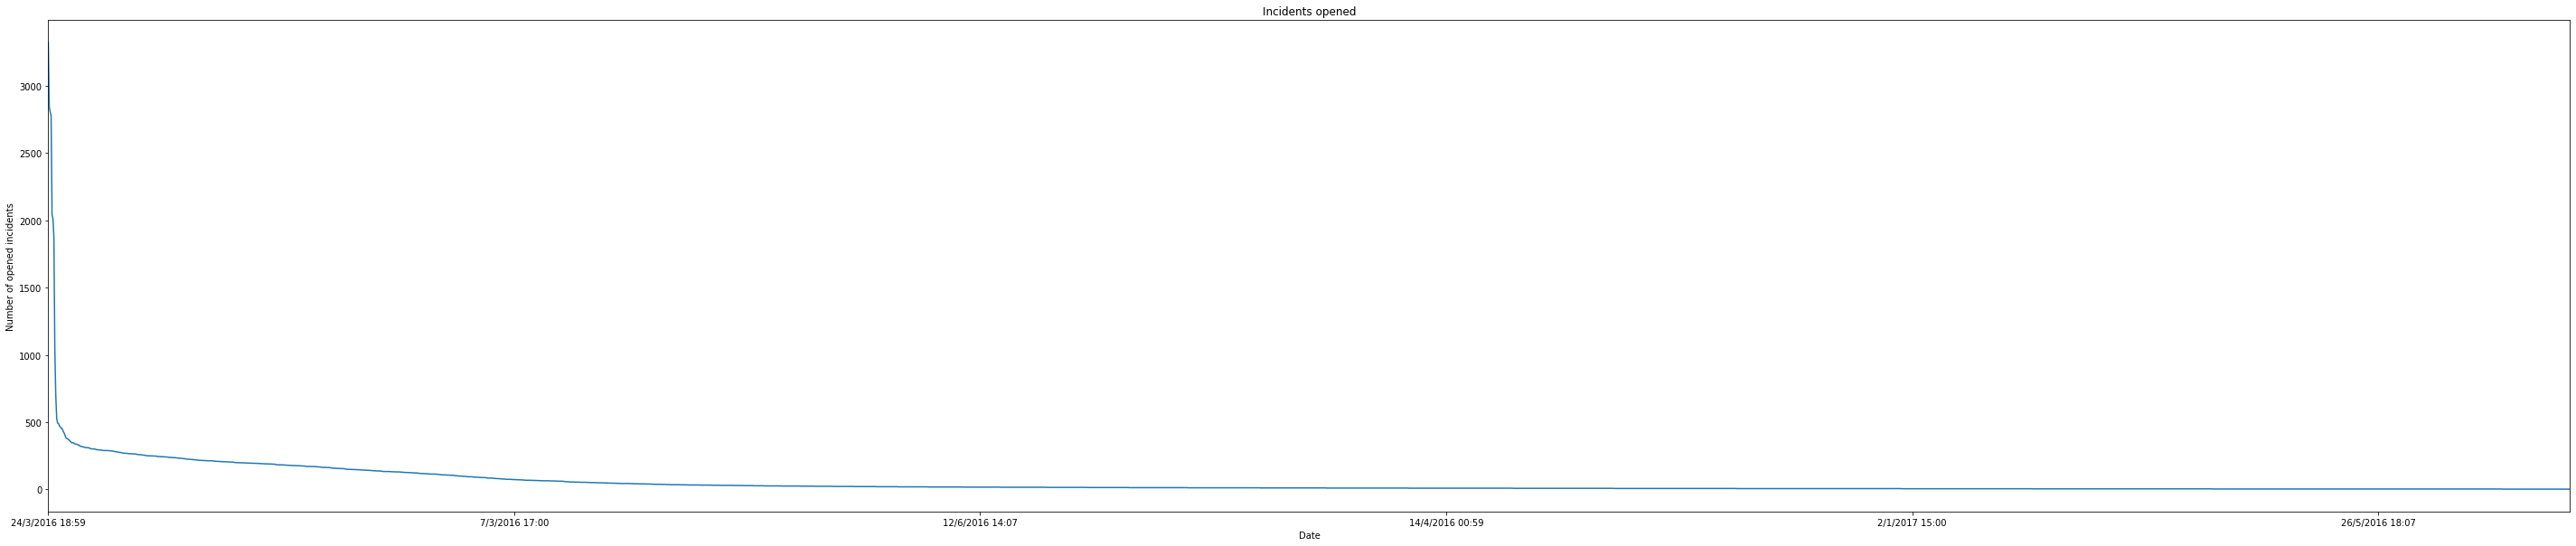

In [10]:
opened_at_incidents = df1["opened_at"].value_counts()
closed_at_incidents.plot()
plt.title('Incidents opened')
plt.ylabel('Number of opened incidents')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (50.0, 10.0)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

### 4)Le nombre de fois ou l’incident a été ré-ouvert a-t-il un impact sur la durée pendant laquelle l’incident reste ouvert ?

#### Besoin de convertir les dates d'ouvertures et de clôtures en nombre afin de pouvoir calculer le temps pendant lequel chaque incident est resté ouvert

In [12]:
import time, datetime
from datetime import datetime

def to_integer(dt_time):
    dt_time=datetime.strptime(dt_time,'%d/%m/%Y %H:%M')
    number=int(datetime.timestamp(dt_time))
    return number

In [13]:
df1["closed_at"] = df1["closed_at"].apply(to_integer)
df1["opened_at"] = df1["opened_at"].apply(to_integer)

In [14]:
df1

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,1456717200,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800


#### Calcul du temps d'ouverture de chaque incident et ajout de cette variable dans le tableau

In [15]:
df1["open_for"] = df1.apply(lambda x: x['closed_at'] -  x['opened_at'], axis=1)

In [16]:
df1

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at,open_for
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,1456704960,...,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,1457175600,470640
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600
5,INC0000047,Active,True,1,0,1,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600
6,INC0000047,Active,True,1,0,2,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600
7,INC0000047,Active,True,1,0,3,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600
8,INC0000047,Active,True,1,0,4,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600
9,INC0000047,Active,True,1,0,5,True,Caller 2403,Opened by 397,1456717200,...,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,1457254800,537600


### 5) Suppression des colonnes ne nous intéressant pas 

In [17]:
df2 = df1.drop(["active","sys_mod_count","resolved_at","made_sla","caller_id","notify","u_priority_confirmation","problem_id","sys_updated_at","sys_created_at","sys_created_by","rfc","vendor","closed_code","caused_by","location","urgency","assigned_to","impact","cmdb_ci","contact_type","sys_updated_by"],axis=1)

In [18]:
df2

,number,incident_state,reassignment_count,reopen_count,opened_by,opened_at,category,subcategory,u_symptom,priority,assignment_group,knowledge,resolved_by,closed_at,open_for
0,INC0000045,New,0,0,Opened by 8,1456704960,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,True,Resolved by 149,1457175600,470640
1,INC0000045,Resolved,0,0,Opened by 8,1456704960,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,True,Resolved by 149,1457175600,470640
2,INC0000045,Resolved,0,0,Opened by 8,1456704960,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,True,Resolved by 149,1457175600,470640
3,INC0000045,Closed,0,0,Opened by 8,1456704960,Category 55,Subcategory 170,Symptom 72,3 - Moderate,Group 56,True,Resolved by 149,1457175600,470640
4,INC0000047,New,0,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 70,True,Resolved by 81,1457254800,537600
5,INC0000047,Active,1,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,True,Resolved by 81,1457254800,537600
6,INC0000047,Active,1,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,True,Resolved by 81,1457254800,537600
7,INC0000047,Active,1,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,True,Resolved by 81,1457254800,537600
8,INC0000047,Active,1,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,True,Resolved by 81,1457254800,537600
9,INC0000047,Active,1,0,Opened by 397,1456717200,Category 40,Subcategory 215,Symptom 471,3 - Moderate,Group 24,True,Resolved by 81,1457254800,537600


### 6) Conversion des booléens en 0 ou 1 et des différentes string en number

In [19]:
from sklearn.preprocessing import LabelEncoder

def conversion(data,column):
    number = LabelEncoder()
    data[column] = number.fit_transform(data[column])
    return data



In [20]:
column = [columns for columns in df2]
for i in range(0,len(column)):
    if df2[str(column[i])].dtypes == "O":
        conversion(df2,str(column[i]))
    if df2[str(column[i])].dtypes == "bool":
        conversion(df2,str(column[i]))

In [21]:
df2

,number,incident_state,reassignment_count,reopen_count,opened_by,opened_at,category,subcategory,u_symptom,priority,assignment_group,knowledge,resolved_by,closed_at,open_for
0,0,7,0,0,201,1456704960,47,70,502,2,48,1,52,1457175600,470640
1,0,8,0,0,201,1456704960,47,70,502,2,48,1,52,1457175600,470640
2,0,8,0,0,201,1456704960,47,70,502,2,48,1,52,1457175600,470640
3,0,6,0,0,201,1456704960,47,70,502,2,48,1,52,1457175600,470640
4,1,7,0,0,121,1456717200,31,113,353,2,64,1,197,1457254800,537600
5,1,1,1,0,121,1456717200,31,113,353,2,16,1,197,1457254800,537600
6,1,1,1,0,121,1456717200,31,113,353,2,16,1,197,1457254800,537600
7,1,1,1,0,121,1456717200,31,113,353,2,16,1,197,1457254800,537600
8,1,1,1,0,121,1456717200,31,113,353,2,16,1,197,1457254800,537600
9,1,1,1,0,121,1456717200,31,113,353,2,16,1,197,1457254800,537600


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X = df2.iloc[:,:-1]

y = df2["open_for"]

X_train, X_test, Y_train, Y_test = train_test_split(X,y)

def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

#### Random Forest Regressor

In [37]:
hyperparametres = {"n_estimators" : 15,
                  "max_features"  :  14}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9995984390843374

In [38]:
hyperparametres = {"n_estimators" :  15,
                  "max_features"  :  14,
                  "max_depth"     :  2}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.645748002292059

In [39]:
hyperparametres = {"n_estimators" :  15,
                  "max_features"  :  14,
                  "max_depth"     :  20}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.999561557222363

#### Decision Tree Regressor

In [40]:
hyperparametres = {"max_features"  :  14}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9994693084299346

In [41]:
hyperparametres = {"max_features"  :  14,
                  "max_depth"      :  2}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.6422703906660312

In [42]:
hyperparametres = {"max_features"  :  14,
                  "max_depth"      :  20}
algorithme = DecisionTreeRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score

0.9990788587496162